In [3]:
import torch
import torch.nn.functional as F 


import matplotlib.pyplot as plt

In [4]:
words = open('names.txt', 'r').read().splitlines()

In [6]:
N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

1:06:00 into the video

In [5]:
# Create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix1)
    # N[ix1, ix2] += 1

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [6]:
xs

tensor([ 0,  5, 13, 13,  1])

In [8]:
ys

tensor([ 0,  5, 13, 13,  1])

In [16]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

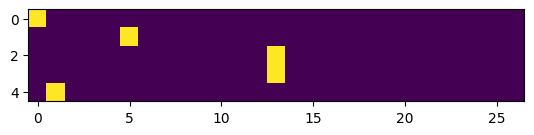

In [17]:
plt.imshow(xenc);

In [22]:
# @ this is a matrix multiplication operator in pytorch

W = torch.randn((27, 27))
xenc @ W  

tensor([[-0.5065, -1.6001,  0.1543, -1.5038,  0.6003,  0.1293,  0.3801,  0.9329,
         -0.1734,  1.0973, -0.7667, -0.4664, -1.5550,  0.6321, -0.8354, -1.0189,
          0.9538,  1.0722, -0.1760,  1.7314, -0.5848,  0.6770, -0.1518,  0.4151,
         -1.7621, -0.8457,  1.6124],
        [-0.0786,  0.4371,  1.6178,  0.8398, -1.1630,  0.5914, -0.7581, -0.9462,
         -0.8864,  0.0635, -0.2182, -1.1287, -1.6756,  0.8278, -0.3998, -0.3225,
          1.6548,  0.9399, -0.0143,  0.5533,  0.1249,  1.9361,  0.8274, -1.9637,
         -0.0043,  0.2374, -0.3217],
        [ 0.0624, -0.8057,  0.7439,  0.0466, -0.3992,  0.2192,  0.1475, -0.5697,
         -0.5436,  1.0771, -0.9591,  1.6696, -1.1074, -0.3922, -1.1530,  1.6938,
         -0.6793,  1.5330, -0.1629,  0.3364, -0.3267, -0.3821, -1.7494, -1.2651,
          0.3915, -0.9126, -0.5953],
        [ 0.0624, -0.8057,  0.7439,  0.0466, -0.3992,  0.2192,  0.1475, -0.5697,
         -0.5436,  1.0771, -0.9591,  1.6696, -1.1074, -0.3922, -1.1530,  1.6938

In [25]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0153, 0.0051, 0.0295, 0.0056, 0.0462, 0.0288, 0.0370, 0.0644, 0.0213,
         0.0759, 0.0118, 0.0159, 0.0053, 0.0476, 0.0110, 0.0091, 0.0657, 0.0740,
         0.0212, 0.1430, 0.0141, 0.0498, 0.0218, 0.0383, 0.0043, 0.0109, 0.1270],
        [0.0214, 0.0358, 0.1165, 0.0535, 0.0072, 0.0417, 0.0108, 0.0090, 0.0095,
         0.0246, 0.0186, 0.0075, 0.0043, 0.0529, 0.0155, 0.0167, 0.1209, 0.0591,
         0.0228, 0.0402, 0.0262, 0.1602, 0.0529, 0.0032, 0.0230, 0.0293, 0.0167],
        [0.0296, 0.0124, 0.0585, 0.0291, 0.0187, 0.0346, 0.0322, 0.0157, 0.0161,
         0.0817, 0.0107, 0.1477, 0.0092, 0.0188, 0.0088, 0.1513, 0.0141, 0.1288,
         0.0236, 0.0389, 0.0201, 0.0190, 0.0048, 0.0078, 0.0411, 0.0112, 0.0153],
        [0.0296, 0.0124, 0.0585, 0.0291, 0.0187, 0.0346, 0.0322, 0.0157, 0.0161,
         0.0817, 0.0107, 0.1477, 0.0092, 0.0188, 0.0088, 0.1513, 0.0141, 0.1288,
         0.0236, 0.0389, 0.0201, 0.0190, 0.0048, 0.0078, 0.0411, 0.0112, 0.0153],
        [0.0082, 0.0309,

In [28]:
probs.shape

torch.Size([5, 27])

In [29]:
# SUMMARY ------------------>>>>

In [31]:
xs

tensor([ 0,  5, 13, 13,  1])

In [32]:
ys

tensor([ 0,  5, 13, 13,  1])

In [30]:
# randomly initialize 27 neuros's weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [33]:
xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding 
logits = xenc @ W # predict log-counts 
counts = logits.exp() # counts, equivalent to N 
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character 
# btw: the last 2 lines here are together called a "softmax"

In [34]:
probs.shape

torch.Size([5, 27])

In [39]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .. (indexes 0,0)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 0
probability assigned by the net to the the correct character: 0.06067225709557533
log likelihood: -2.8022687435150146
negative log likelihood: 2.8022687435150146
--------
bigram example 2: ee (indexes 5,5)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.

In [38]:
# ------------- !!! OPTIMIZATION !!! ---------------

In [54]:
# randomly initialize 27 neuros's weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [68]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding 
logits = xenc @ W # predict log-counts 
counts = logits.exp() # counts, equivalent to N 
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character 
loss = -probs[torch.arange(5), ys].log().mean()

In [69]:
print(loss.item())

3.6122443675994873


In [66]:
# Backward pass
W.grad = None 
loss.backward()

In [67]:
# Update to the tensor
W.data += -0.1 * W.grad

In [70]:
# ----------- Putting it all together -------------------

In [30]:
# Create the training set of bigrams (x,y)
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    #print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the "network"
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples:  228146


In [32]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding 
    logits = xenc @ W # predict log-counts 
    counts = logits.exp() # counts, equivalent to N 
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character 
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None 
    loss.backward()

    # update
    W.data += -50 * W.grad    

3.672508716583252
3.321807622909546
3.1243221759796143
3.000220775604248
2.91317081451416
2.8495664596557617
2.8013453483581543
2.7633864879608154
2.7325382232666016
2.7068352699279785
2.685014009475708
2.6662347316741943
2.6499154567718506
2.635629415512085
2.623049259185791
2.611915111541748
2.602012872695923
2.5931639671325684
2.5852203369140625
2.5780556201934814
2.5715653896331787
2.5656604766845703
2.5602667331695557
2.5553207397460938
2.550769090652466
2.5465660095214844
2.5426740646362305
2.5390591621398926
2.535693883895874
2.5325541496276855
2.5296192169189453
2.5268704891204834
2.5242919921875
2.5218701362609863
2.5195915699005127
2.5174458026885986
2.5154218673706055
2.5135111808776855
2.511704444885254
2.5099949836730957
2.5083751678466797
2.5068390369415283
2.505380392074585
2.5039939880371094
2.5026748180389404
2.5014188289642334
2.500220775604248
2.4990782737731934
2.4979865550994873
2.496943235397339
2.4959447383880615
2.4949886798858643
2.4940719604492188
2.4931929111

In [33]:
W.data

tensor([[-2.5462e+00,  2.1190e+00,  9.0085e-01,  1.0672e+00,  1.1590e+00,
          1.0601e+00, -2.4535e-01,  2.3012e-01,  4.9830e-01,  1.0563e-01,
          1.5193e+00,  1.7210e+00,  1.0865e+00,  1.5661e+00,  7.6991e-01,
         -3.0225e-01, -3.2712e-02, -1.7625e+00,  1.1283e+00,  1.3548e+00,
          9.0238e-01, -1.7914e+00, -3.4989e-01, -5.5373e-01, -1.3608e+00,
          5.5917e-03,  5.5950e-01],
        [ 2.2273e+00, -2.5596e-01, -2.8342e-01, -4.2487e-01,  3.7396e-01,
         -3.6321e-02, -1.6577e+00, -1.4596e+00,  1.1804e+00,  8.3421e-01,
         -1.4115e+00, -2.3451e-01,  1.2612e+00,  8.2446e-01,  2.0275e+00,
         -2.2382e+00, -2.0526e+00, -2.3270e+00,  1.5169e+00,  4.4447e-01,
         -4.3596e-02, -6.3626e-01,  1.5083e-01, -1.4932e+00, -1.3742e+00,
          1.0515e+00, -5.0278e-01],
        [ 8.4188e-01,  2.0740e+00, -3.0394e-02, -5.5325e-01, -1.3936e-01,
          2.8412e+00, -7.0106e-01, -8.6571e-01, -6.1971e-01,  1.4827e+00,
         -4.1527e-01, -1.2691e+00,  8.81

In [34]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647+1)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

can.
ahior.
slea.
eman.
areiakialaveiphali.


In [1]:
# ------------- EXERCISES -------------------

E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?

E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?

E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?

E06: meta-exercise! Think of a fun/interesting exercise and complete it.

In [37]:
# E01

x1, x2, ys = [], [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    print(ch1, ch2, ch3)
    x1.append(ix1)
    x2.append(ix2)
    ys.append(ix3)


. e m
e m m
m m a
m a .


In [38]:
x1

[0, 5, 13, 13]

In [39]:
x2

[5, 13, 13, 1]

In [40]:
ys

[13, 13, 1, 0]

In [41]:
x1 = torch.tensor(x1)
x2 = torch.tensor(x2)
ys = torch.tensor(ys)

In [42]:
# initialize the "network"
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [ ]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding 
    logits = xenc @ W # predict log-counts 
    counts = logits.exp() # counts, equivalent to N 
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character 
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None 
    loss.backward()

    # update
    W.data += -50 * W.grad    